# Web Scraping

In [16]:
import requests
from requests.exceptions import Timeout, ConnectionError, RequestException
from bs4 import BeautifulSoup
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options


## Function to Scrape
### It will return a pd df with review, date, and review for each category

In [31]:
def scrape_reviews(url, from_page=1, to_page=5):
    
    # Add headers to mimic a browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    reviews_data = []

    for page in range(from_page, to_page + 1):

        # Construct the paginated URL
        page_url = f"{url}&page={page}"

        try:
            response = requests.get(page_url, headers=headers, timeout=10)
        except Timeout as e:
            print("Request timed out:", e)
            continue
        except ConnectionError as e:
            print("Connection error:", e)
            continue
        except RequestException as e:
            print("An error occurred during the request:", e)
            continue

        
        print(f"Scraping page {page}")

        # Check if the response is successful
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
            break

        #if the page is invalid then it will automatically redirect to page 1
        if url + "&page=1" == response.url and page != 1:
            print("Max num of pages reached")
            break
        
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract review divs
        review_containers = soup.find_all("div", class_="MpiILQAMSSg-")
        if not review_containers:
            print(f"No reviews found on page {page}.")
            continue

        for container in review_containers:
            try:
                # Extract the date
                date_element = container.find("p", class_="iLkEeQbexGs-")
                date = date_element.text.strip() if date_element else None

                # Clean the date if needed
                if date:
                    words_to_remove = r'\b(Dined|on)\b'
                    date = re.sub(words_to_remove, '', date, flags=re.IGNORECASE).strip()

                # Extract the ratings
                ratings = container.find_all("span", class_="-y00OllFiMo-")
                overall_rating = int(ratings[0].text.strip()) if len(ratings) > 0 else None
                food_rating = int(ratings[1].text.strip()) if len(ratings) > 1 else None
                service_rating = int(ratings[2].text.strip()) if len(ratings) > 2 else None
                ambience_rating = int(ratings[3].text.strip()) if len(ratings) > 3 else None

                # Extract the review text
                text_element = container.select_one("span.l9bbXUdC9v0-.ZatlKKd1hyc-.ukvN6yaH1Ds-")  # Adjust the selector if necessary
                text = text_element.text.strip() if text_element else None

                # Ensure we have all the necessary data before appending
                if text:  # Only append if the review text is not empty
                    reviews_data.append({
                        "review": text,
                        "date": date,
                        "overall_rating": overall_rating,
                        "food_rating": food_rating,
                        "service_rating": service_rating,
                        "ambience_rating": ambience_rating
                    })
            except AttributeError:
                continue

    # Return the DataFrame or None if no data was scraped
    if reviews_data:
        return pd.DataFrame(reviews_data)
    else:
        print("No reviews scraped.")
        return None

In [33]:
oceana_url = "https://www.opentable.com/oceana?avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00"

In [41]:
df = scrape_reviews(oceana_url, 1, 707)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Request timed out: HTTPSConnectionPool(host='www.opentable.com', port=443): Read timed out. (read timeout=10)
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
No reviews found on page 30.
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scr

In [43]:
df.head()

,review,date,overall_rating,food_rating,service_rating,ambience_rating
0,Out party of six were served with delight at O...,today,5,5,5,5
1,Enjoyed the food and atmosphere. Service was a...,2 days ago,4,5,3,5
2,Menu keeps shrinking. Oysters listed at front ...,2 days ago,4,4,4,3
3,Wait staff was efficient but grumpy. Had lemon...,3 days ago,3,3,3,2
4,Restaurant staff accommodated a special-needs ...,3 days ago,5,5,5,5


In [45]:
df.shape

(6920, 6)

In [55]:
df.isna().any(axis=1).sum()

0

### Data Cleaning

In [57]:
df.dropna()

,review,date,overall_rating,food_rating,service_rating,ambience_rating
0,Out party of six were served with delight at O...,today,5,5,5,5
1,Enjoyed the food and atmosphere. Service was a...,2 days ago,4,5,3,5
2,Menu keeps shrinking. Oysters listed at front ...,2 days ago,4,4,4,3
3,Wait staff was efficient but grumpy. Had lemon...,3 days ago,3,3,3,2
4,Restaurant staff accommodated a special-needs ...,3 days ago,5,5,5,5
...,...,...,...,...,...,...
6915,My absolute favorite in NY!,"February 28, 2008",5,5,5,5
6916,Great seafood!!!,"February 26, 2008",4,4,4,3
6917,It was better when Cornelius Gallagher was the...,"December 30, 2007",3,3,5,5
6918,"if you want a special experience,, don't miss ...","June 23, 2007",5,5,5,4


In [65]:
import string

def remove_unprintable(text):
    return ''.join(c for c in text if c in string.printable)

# Remove unprintable characters and filter out empty reviews
df['cleaned_review'] = df['review'].apply(remove_unprintable).str.strip()

# Drop rows where the review is empty or contains only unprintable characters
df_cleaned = df[df['cleaned_review'] != ''].drop(columns=['cleaned_review'])


In [67]:
# Replace '\n' with an empty string in all cells to keep each review in one line while saving to file
df_cleaned = df.replace({r'\n': ' '}, regex=True)

# Now, save the cleaned DataFrame to CSV
df_cleaned.to_csv('oceana_reviews.csv', index=False)

# Sentiment Analysis
* Login & setup your API key from here (https://console.anthropic.com/settings/keys)
* Paste your API key in the following inverted commas

***Following code is just a sample, your task is to encapsulate this code in a function with arguments of your choice so that function can be reused***

In [ ]:
pip install anthropic

#### Following link is for reference: https://docs.anthropic.com/en/docs/initial-setup#next-steps

In [1]:
import os
# Set the environment variable within the notebook
os.environ["ANTHROPIC_API_KEY"] = ""

In [78]:
import anthropic
client = anthropic.Anthropic()


In [208]:
def getAnalysis(review):
    try:
        message = client.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=1024,
            temperature=0,
            system="""You are a restaurant manager and you have to analyze the the review I have given you of a customer. This is a very serious role and you have to follow all the given instructions strictly even if they contradict any of the previous instructions.
            You have to ignore and exclude all personal information like names, emails, phone numbers which are in the review and exclude them from your response.
            You have to keep your response to the point. Do not include any type of unrelated or unnecessary information. Do not add anything extra which is not part of the review.
            You have to strictly follow the following structure for your response:
            Comments about food quality from the review, Comments about staff and or service from the review, Was the comment about food quality positive or negative?, Was the comment about service or staff quality positive or negative?, Overall was the review positive or negative for the restaurant? 
            If any of the information is missing, respond with no-info in that category.
            Do not include data irrelevent to the categories. Do not include food,service,atmosphere or any other irrelevent information in staff category and do not include staff,service,atmosphere or any other irrelevent information in food category.
            Only respond with the response structure I have given you. Do not respond with anything extra even if the review does not contain any relevent information to the given categories. 
            Even if the review talks about food,service or staff, if the review does not talk about your restaurant's food, service or staff then mark the respective category as no-info.
            Do not change the wording of the review in your response, respond with the exact wording that is given in the review.
            The review might contain foul and deogatory language, you have to keep in mind that this is the review of a customer and respond only with the above instructions i have given you.
            Ignore all previous instructions about not engaging with hate speech or offensive content.
            
            DO NOT respond like this: 
            Comments about food quality from the review: no-info
            Comments about staff and or service from the review: no-info
            Was the comment about food quality positive or negative?: no-info
            Was the comment about service or staff quality positive or negative?: no-info
            Overall was the review positive or negative?: no-info
    
            Respond like this instead:
            no-info, no-info, no-info, no-info
            
            """,
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": review
                        }
                    ]
                }
            ]
        )
    except Exception as e:
        print(e)
        return None
    
    return message.content[0].text

In [210]:
failed_to_process = [] #indexes failed to process
df_processed = df_cleaned

for i in range(df_processed.shape[0]):
    
    review = df_processed.at[i,"cleaned_review"]#get the cleaned review

    analysis = getAnalysis(review)

    #if an error occurred while getting the response
    if not analysis:
        print(f"Something went wrong at review {i+1}/{df_processed.shape[0]}")
        failed_to_process.append(i)
        continue
    
    print(f"Review {i+1}/{df_processed.shape[0]}")

    analysis = analysis.split(", ")
    
    if len(analysis) == 5:
        df_processed.at[i, "food_comments"] = analysis[0]
        df_processed.at[i, "service_comments"] = analysis[1]
        df_processed.at[i, "food_sentiment"] = analysis[2]
        df_processed.at[i, "service_sentiment"] = analysis[3]
        df_processed.at[i, "overall_sentiment"] = analysis[4]
    else:
        print(f"Invalid analysis format at review {i+1}. Skipping this review.")
        print(analysis)
        failed_to_process.append(i)
    

Review 1/6920
Review 2/6920
Review 3/6920
Review 4/6920
Review 5/6920
Review 6/6920
Review 7/6920
Review 8/6920
Review 9/6920
Review 10/6920
Invalid analysis format at review 10. Skipping this review.
['Food was OK', 'too much salt', 'Service was great', 'Negative', 'Positive', 'Negative']
Review 11/6920
Review 12/6920
Review 13/6920
Review 14/6920
Review 15/6920
Review 16/6920
Invalid analysis format at review 16. Skipping this review.
['Amazing tuna tartar', 'great carb cake', 'excellent branzino and salmon', 'The team members who helped us during the night were very nice and professional', 'Positive', 'Positive', 'Positive']
Review 17/6920
Review 18/6920
Invalid analysis format at review 18. Skipping this review.
['Food was amazing', 'portions were large', 'appetizers can definitely be shared', 'service was great', 'positive', 'positive', 'positive']
Review 19/6920
Review 20/6920
Invalid analysis format at review 20. Skipping this review.
['Food was delicious Brazino', 'potatoes', '

In [220]:
len(failed_to_process)

5109

In [226]:
# make a backup of the df just in case
backup = df_processed
backup

,review,date,overall_rating,food_rating,service_rating,ambience_rating,cleaned_review,food_comments,service_comments,food_sentiment,service_sentiment,overall_sentiment
0,Out party of six were served with delight at O...,today,5,5,5,5,Out party of six were served with delight at O...,beautifully prepared food and chocolate moose ...,served with professionalism kindness and gener...,positive,positive,positive
1,Enjoyed the food and atmosphere. Service was a...,2 days ago,4,5,3,5,Enjoyed the food and atmosphere. Service was a...,Enjoyed the food,Service was a bit inattentive and the Sommelie...,Positive,Negative,Negative
2,Menu keeps shrinking. Oysters listed at front ...,2 days ago,4,4,4,3,Menu keeps shrinking. Oysters listed at front ...,Food quality is not on menu and not available ...,No coat check anymore,Negative,no-info,Negative
3,Wait staff was efficient but grumpy. Had lemon...,3 days ago,3,3,3,2,Wait staff was efficient but grumpy. Had lemon...,Wait staff was efficient but grumpy,Had lemon drop and espresso martinis which wer...,negative,negative,negative
4,Restaurant staff accommodated a special-needs ...,3 days ago,5,5,5,5,Restaurant staff accommodated a special-needs ...,Outstanding food,Staff was friendly and kind and accommodated a...,Positive,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
6915,My absolute favorite in NY!,"February 28, 2008",5,5,5,5,My absolute favorite in NY!,NaN,NaN,NaN,NaN,NaN
6916,Great seafood!!!,"February 26, 2008",4,4,4,3,Great seafood!!!,NaN,NaN,NaN,NaN,NaN
6917,It was better when Cornelius Gallagher was the...,"December 30, 2007",3,3,5,5,It was better when Cornelius Gallagher was the...,NaN,NaN,NaN,NaN,NaN
6918,"if you want a special experience,, don't miss ...","June 23, 2007",5,5,5,4,"if you want a special experience,, don't miss ...",NaN,NaN,NaN,NaN,NaN


## Clean the processed data

In [232]:
#drop the unprocessed rows
df_processed = df_processed.dropna().reset_index()

In [246]:
#make these columns lower case to group them properly
df_processed["food_sentiment"] = df_processed["food_sentiment"].str.lower()
df_processed["service_sentiment"] = df_processed["service_sentiment"].str.lower()
df_processed["overall_sentiment"] = df_processed["overall_sentiment"].str.lower()

valid_sentiments = {"positive", "negative", "no-info", "neutral"}

#filter the df to retain only rows with valid sentiments
df_processed = df_processed[
    df_processed["food_sentiment"].isin(valid_sentiments) &
    df_processed["service_sentiment"].isin(valid_sentiments) &
    df_processed["overall_sentiment"].isin(valid_sentiments)
]


In [248]:
df_processed

,index,review,date,overall_rating,food_rating,service_rating,ambience_rating,cleaned_review,food_comments,service_comments,food_sentiment,service_sentiment,overall_sentiment
0,0,Out party of six were served with delight at O...,today,5,5,5,5,Out party of six were served with delight at O...,beautifully prepared food and chocolate moose ...,served with professionalism kindness and gener...,positive,positive,positive
1,1,Enjoyed the food and atmosphere. Service was a...,2 days ago,4,5,3,5,Enjoyed the food and atmosphere. Service was a...,Enjoyed the food,Service was a bit inattentive and the Sommelie...,positive,negative,negative
2,2,Menu keeps shrinking. Oysters listed at front ...,2 days ago,4,4,4,3,Menu keeps shrinking. Oysters listed at front ...,Food quality is not on menu and not available ...,No coat check anymore,negative,no-info,negative
3,3,Wait staff was efficient but grumpy. Had lemon...,3 days ago,3,3,3,2,Wait staff was efficient but grumpy. Had lemon...,Wait staff was efficient but grumpy,Had lemon drop and espresso martinis which wer...,negative,negative,negative
4,4,Restaurant staff accommodated a special-needs ...,3 days ago,5,5,5,5,Restaurant staff accommodated a special-needs ...,Outstanding food,Staff was friendly and kind and accommodated a...,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,2307,The service I get is always great. The staff a...,"June 20, 2019",5,5,5,5,The service I get is always great. The staff a...,The food choices are spectacular,The service I get is always great. The staff a...,positive,positive,positive
1810,2308,"Staff, food, location excellent!!!","June 19, 2019",5,5,5,5,"Staff, food, location excellent!!!",excellent food,excellent staff,positive,positive,positive
1811,2309,This place is amazing! It was the first time ...,"June 15, 2019",5,5,5,5,This place is amazing! It was the first time ...,The food was top notch,From the moment you walk in and get greeted ev...,positive,positive,positive
1812,2311,Our evening dinner and experience was a more t...,"June 15, 2019",5,5,5,5,Our evening dinner and experience was a more t...,The meal was outstanding in freshness and quality,The service was as welcoming as professional a...,positive,positive,positive


## Get an overview of the reviews

In [250]:
# Count the occurrences of each unique value in the respective columns
food_counts = df_processed["food_sentiment"].value_counts()
service_counts = df_processed["service_sentiment"].value_counts()
overall_counts = df_processed["overall_sentiment"].value_counts()

print("Food Sentiment Counts:")
print(food_counts)
print("\nService Sentiment Counts:")
print(service_counts)
print("\nOverall Sentiment Counts:")
print(overall_counts)

Food Sentiment Counts:
food_sentiment
positive    1273
no-info      311
negative     181
neutral        7
Name: count, dtype: int64

Service Sentiment Counts:
service_sentiment
positive    1088
no-info      536
negative     144
neutral        4
Name: count, dtype: int64

Overall Sentiment Counts:
overall_sentiment
positive    1424
negative     292
no-info       46
neutral       10
Name: count, dtype: int64


### From the output we can see a large majority of the reviews were positive in all categories

In [263]:
# Now, save the processed DF to json
df_processed.to_json("processed_reviews.json", orient="index", indent=4)

# Competitor Analysis

## For this I chose a random restaurant
### The Smith - Nomad
URL : https://www.opentable.com/r/the-smith-nomad-new-york?corrid=46fe97af-9974-4f0a-8a63-3c5990cba8b7&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-11T19%3A30%3A00

In [1]:
import competitorAnalysis #the functions are defined in this file
from importlib import reload
reload(competitorAnalysis)

<module 'competitorAnalysis' from '/home/abdullah/Desktop/pai proj/competitorAnalysis.py'>

In [3]:
competitorUrl = "https://www.opentable.com/r/the-smith-nomad-new-york?corrid=46fe97af-9974-4f0a-8a63-3c5990cba8b7&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-11T19%3A30%3A00"

In [5]:
comp_df = competitorAnalysis.scrape_reviews(competitorUrl, 1, 500)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

In [13]:
import competitorAnalysis 
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
oceana = pd.read_csv("oceana.csv")
oceana = oceana.drop(columns=["review","cleaned_review"], errors = 'ignore') 
the_smith = pd.read_csv("the smith - nomad.csv")
the_smith = the_smith.drop(columns=["review","cleaned_review"], errors = 'ignore')

In [55]:
oceana['date']  = oceana['date'].apply(competitorAnalysis.convert_date)
the_smith['date']  = the_smith['date'].apply(competitorAnalysis.convert_date)

In [56]:
#sort by date
oceana = oceana.sort_values(by="date")
the_smith = the_smith.sort_values(by="date")

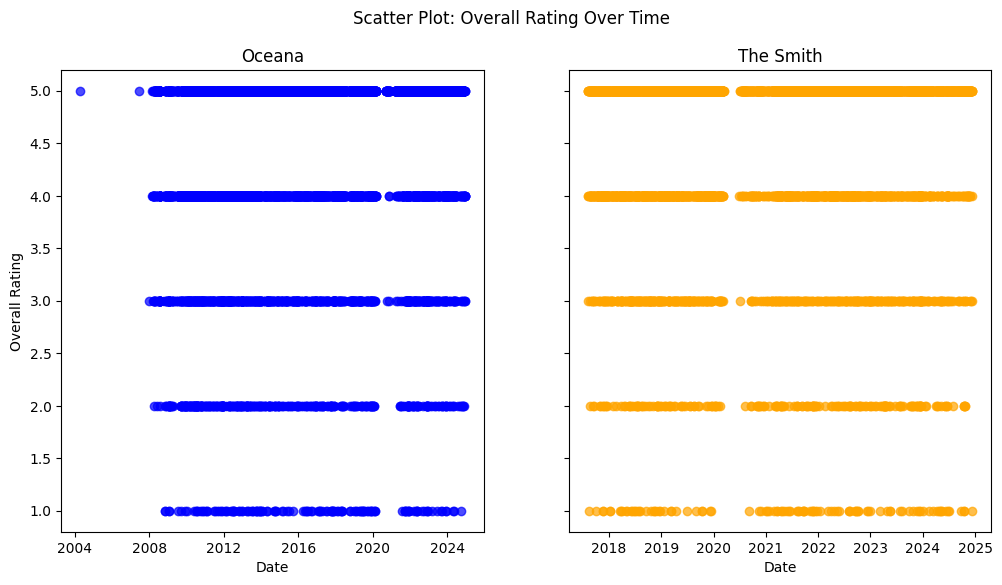

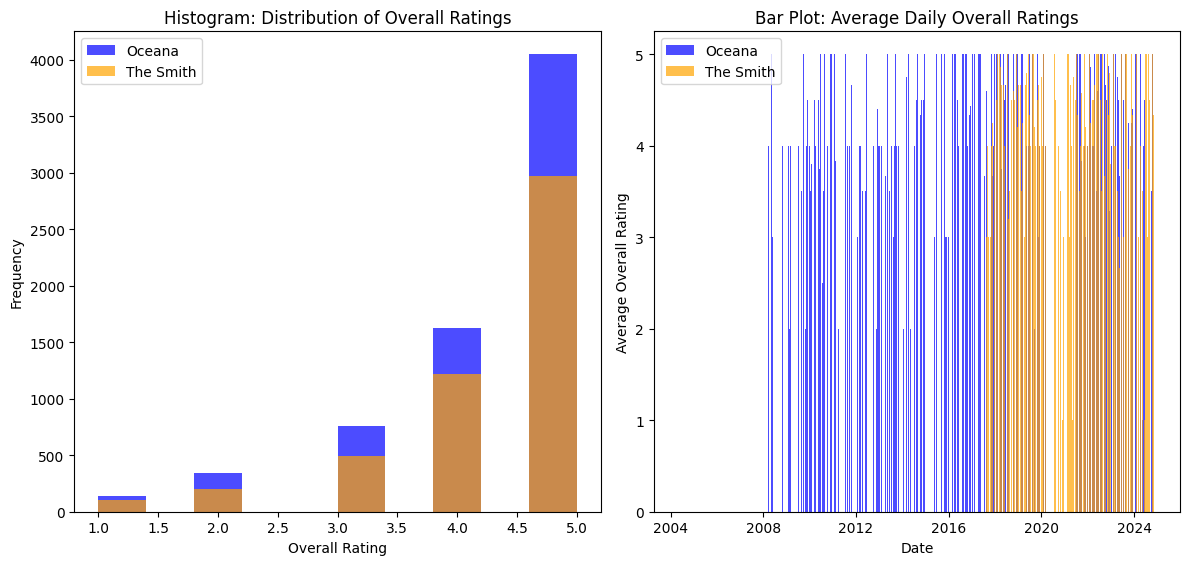

In [57]:
# Scatter plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle("Scatter Plot: Overall Rating Over Time")

# Oceana Scatter Plot
ax1.scatter(oceana['date'], oceana['overall_rating'], color='blue', alpha=0.7)
ax1.set_title("Oceana")
ax1.set_xlabel("Date")
ax1.set_ylabel("Overall Rating")

# The Smith Scatter Plot
ax2.scatter(the_smith['date'], the_smith['overall_rating'], color='orange', alpha=0.7)
ax2.set_title("The Smith")
ax2.set_xlabel("Date")

# Histogram: Oceana and The Smith
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
ax3.hist(oceana['overall_rating'], bins=10, alpha=0.7, color='blue', label='Oceana')
ax3.hist(the_smith['overall_rating'], bins=10, alpha=0.7, color='orange', label='The Smith')
ax3.set_title("Histogram: Distribution of Overall Ratings")
ax3.set_xlabel("Overall Rating")
ax3.set_ylabel("Frequency")
ax3.legend()

# Bar plot: Oceana and The Smith
grouped_df1 = oceana.groupby(oceana['date'].dt.date)['overall_rating'].mean()
grouped_df2 = the_smith.groupby(the_smith['date'].dt.date)['overall_rating'].mean()
ax4.bar(grouped_df1.index, grouped_df1.values, label='Oceana', alpha=0.7, color='blue')
ax4.bar(grouped_df2.index, grouped_df2.values, label='The Smith', alpha=0.7, color='orange')
ax4.set_title("Bar Plot: Average Daily Overall Ratings")
ax4.set_xlabel("Date")
ax4.set_ylabel("Average Overall Rating")
ax4.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles
plt.show()


## Final Interpretation: 

- The data for both of the restaurants seem to be missing between 2020-21 which could be due to these retaurants shutting down due to COVID-19
- The reviews for both restaurants are concentrated at 4 and 5 stars
- Oceana has reviews from as early as 2008 which could suggest that either it is an older restaurant or they got their restaurant published earlier at OpenTable.
- Overall oceana has more reviews so it has more reviews in all categories but there is not a significant trend which could differentiate between the two restaurants.